In [2]:
# Loading dataset for cats and dogs
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-07-08 16:00:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  19.9MB/s    in 4.1s    

2023-07-08 16:01:00 (15.9 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# Extracting data
import zipfile

zipfile_localation = "/content/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(zipfile_localation, "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
# assigning directories
train_loc = "/content/cats_and_dogs_filtered/train"
val_loc = "/content/cats_and_dogs_filtered/validation"

train_cats_loc = "/content/cats_and_dogs_filtered/train/cats"
train_dogs_loc = "/content/cats_and_dogs_filtered/train/dogs"

val_cats_loc = "/content/cats_and_dogs_filtered/validation/cats"
val_dogs_loc = "/content/cats_and_dogs_filtered/validation/dogs"

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

Building CNN model

In [6]:
from keras.layers import BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), padding = "valid", activation = "relu", input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add(Conv2D(32, kernel_size=(3,3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides= 2, padding="valid"))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

Creating Generator for augmentation

In [10]:
batch_size = 20

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=40,
        fill_mode='nearest',
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling. We only want augementation while training
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of train_loc, and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_loc,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        val_loc,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


We can now use these generators to train our model.

In [11]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # saving our weights after training or during training

Epoch 1/10


<ipython-input-11-4367a06f3353>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 18s 176ms/step - loss: 0.5105 - accuracy: 0.7510 - val_loss: 0.6078 - val_accuracy: 0.6625
Epoch 2/10
100/100 [==============================] - 19s 188ms/step - loss: 0.4866 - accuracy: 0.7565 - val_loss: 0.5231 - val_accuracy: 0.7387
Epoch 3/10
100/100 [==============================] - 18s 176ms/step - loss: 0.4856 - accuracy: 0.7665 - val_loss: 0.4924 - val_accuracy: 0.7538
Epoch 4/10
100/100 [==============================] - 18s 179ms/step - loss: 0.4615 - accuracy: 0.7765 - val_loss: 0.6054 - val_accuracy: 0.7350
Epoch 5/10
100/100 [==============================] - 21s 211ms/step - loss: 0.4598 - accuracy: 0.7815 - val_loss: 0.5150 - val_accuracy: 0.7387
Epoch 6/10
100/100 [==============================] - 18s 178ms/step - loss: 0.4395 - accuracy: 0.7930 - val_loss: 0.5386 - val_accuracy: 0.7525
Epoch 7/10
100/100 [==============================] - 19s 186ms/step - loss: 0.4490 - accuracy: 0.7925 - val_loss: 0.5253 - val_accuracy: 0.7

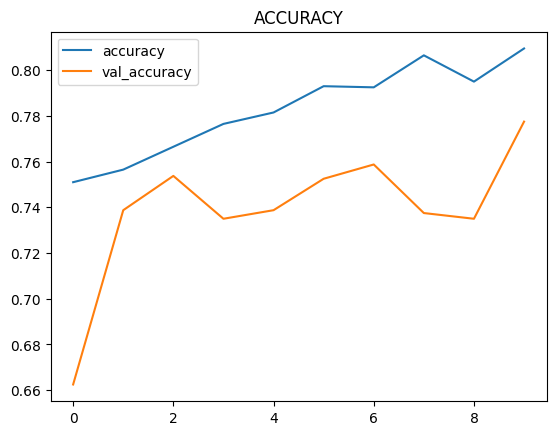

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.title("ACCURACY")
plt.legend()
plt.show()

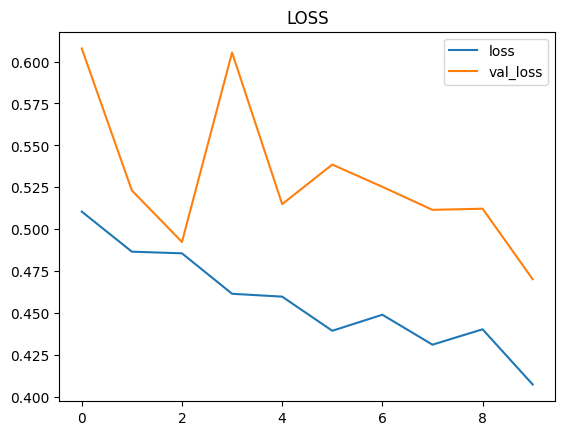

In [13]:
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.title("LOSS")
plt.show()